In [12]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data "
column_names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=column_names)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [13]:
import pandas as pd
import numpy as np

data_array = df.to_numpy()

In [14]:
import pandas as pd
import numpy as np


print("shape dari dataset:", data_array.shape)
print("size dari dataset:", data_array.size)

shape dari dataset: (150, 5)
size dari dataset: 750


In [15]:
import pandas as pd
setosa = df[df['species'] == 'iris-setosa']
versicolor = df[df['species'] == 'iris-versicolor']
virginica = df[df['species'] == 'iris-virginica']

In [16]:
setosa. to_csv ('iris-setosa', index=False)
versicolor. to_csv ('iris-versicolor', index=False)
virginica. to_csv ('iris-virginica', index=False)

In [17]:
np.save('setosa', setosa.to_numpy())
np.save('versicolor', versicolor.to_numpy())
np.save('virginica', virginica.to_numpy())

In [18]:
np.savez(
    'iris_dataset.npz',
    setosa=setosa.to_numpy(),
    versicolor=versicolor.to_numpy(),
    virginica=virginica.to_numpy()
)


In [19]:
np.savez(
    'iris_dataset.npz',
    setosa=setosa.to_numpy(),
    versicolor=versicolor.to_numpy(),
    virginica=virginica.to_numpy()
)

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Load data iris
iris_raw = load_iris()
iris = pd.DataFrame(data=iris_raw.data, columns=iris_raw.feature_names)
iris['class'] = iris_raw.target
iris['class'] = iris['class'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

# Gunakan hanya dua kelas untuk klasifikasi biner
iris_binary = iris[iris['class'] != 'Iris-virginica']
X = iris_binary.iloc[:, :-1].values
y = np.where(iris_binary['class'] == 'Iris-setosa', 0, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

# Prediksi
predictions = p.predict(X_test)

# Akurasi
accuracy = np.mean(predictions == y_test)
print(f"Akurasi: {accuracy * 100:.2f}%")


Akurasi: 100.00%


In [42]:
import matplotlib.pyplot as plt
def plot_iris(data, title):
    plt.figure(figsize=(10, 6))
    for i in range(4):
        plt.plot(data[:, i], label=column_names[i])
    plt.title(title)
    plt.xlabel('Data ke-')
    plt.ylabel('Ukuran iris (cm)')
    plt.legend()
    plt.grid()
    plt.show()

In [47]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data "

In [61]:
def min_max_normalize(data):
    min_vals = data[:, :4].min(axis=0)
    max_vals = data[:, :4].max(axis=0)
    normalized = (data[:, :4] - min_vals) / (max_vals - min_vals)
    return normalized.astype(np.float64)
    normalized = (data[:, :4] - min_vals) / (max_vals - min_vals)
    return normalized.astype(np.float64)

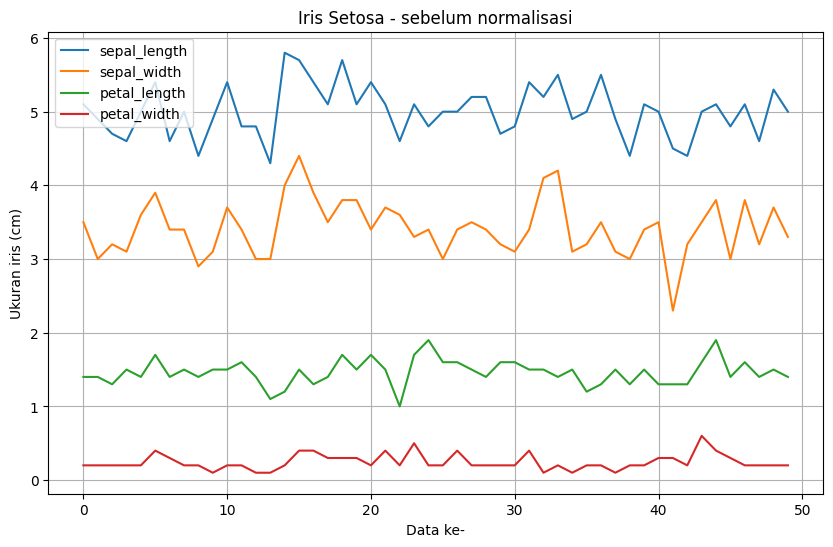

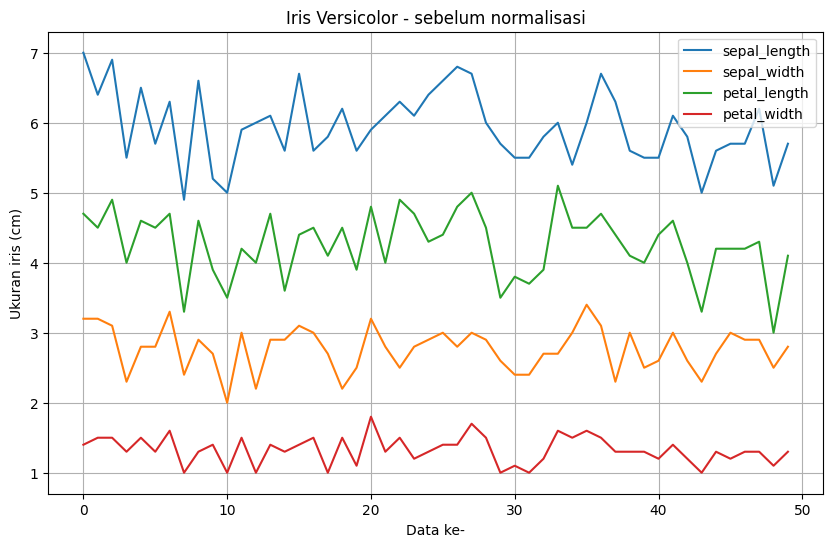

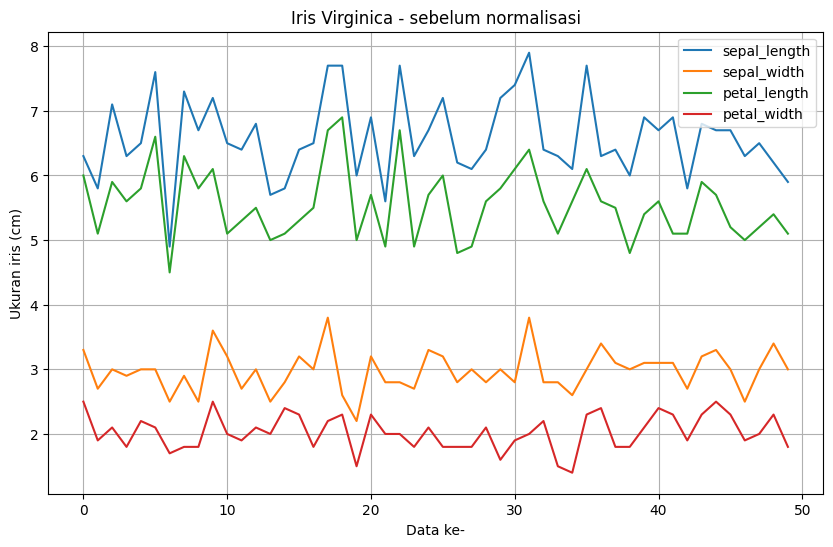

In [69]:
plot_iris(iris_setosa, "Iris Setosa - sebelum normalisasi")
plot_iris(iris_versicolor, "Iris Versicolor - sebelum normalisasi")
plot_iris(iris_virginica, "Iris Virginica - sebelum normalisasi")

In [66]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=column_names)

# Correctly assign data to iris_setosa, iris_versicolor, and iris_virginica
iris_setosa = df[df['species'] == 'Iris-setosa'].to_numpy()
iris_versicolor = df[df['species'] == 'Iris-versicolor'].to_numpy()
iris_virginica = df[df['species'] == 'Iris-virginica'].to_numpy()

def min_max_normalize(data):
    min_vals = data[:, :4].min(axis=0)
    max_vals = data[:, :4].max(axis=0)
    normalized = (data[:, :4] - min_vals) / (max_vals - min_vals)
    return normalized.astype(np.float64)

# Now you can normalize your data:
norm_setosa = min_max_normalize(iris_setosa)
norm_versicolor = min_max_normalize(iris_versicolor)
norm_virginica = min_max_normalize(iris_virginica)

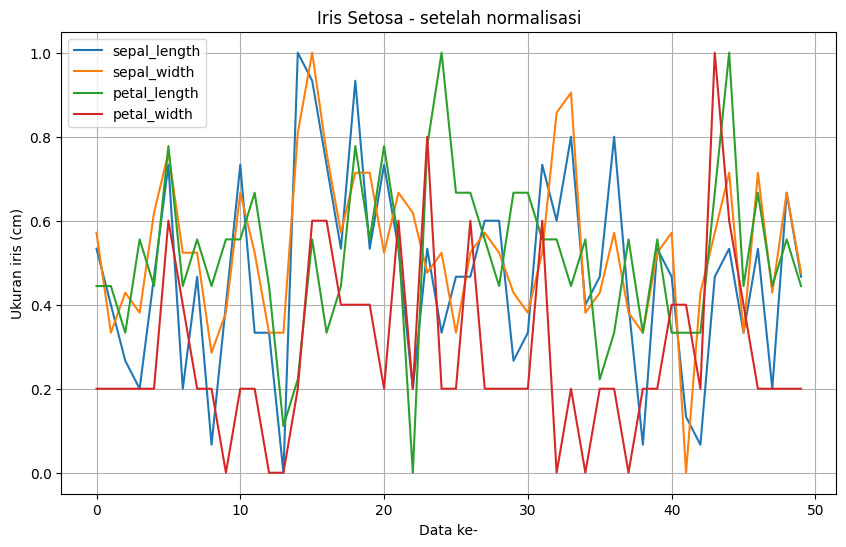

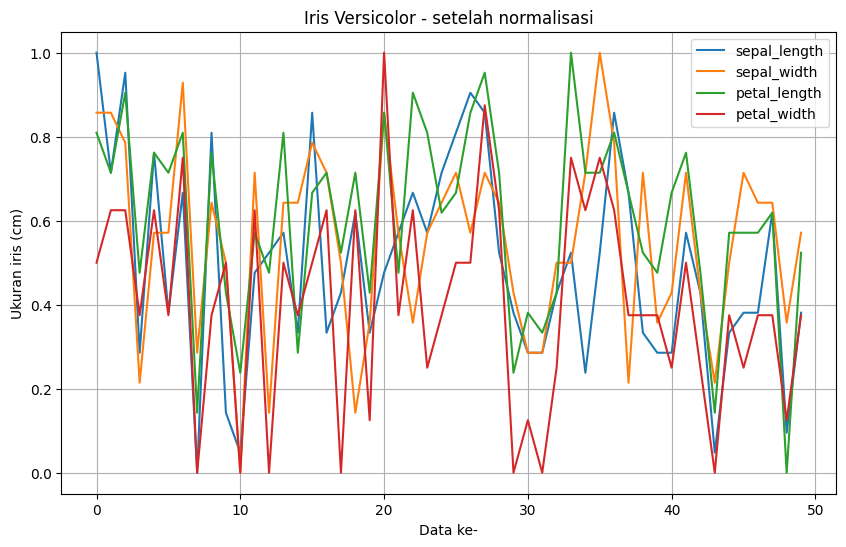

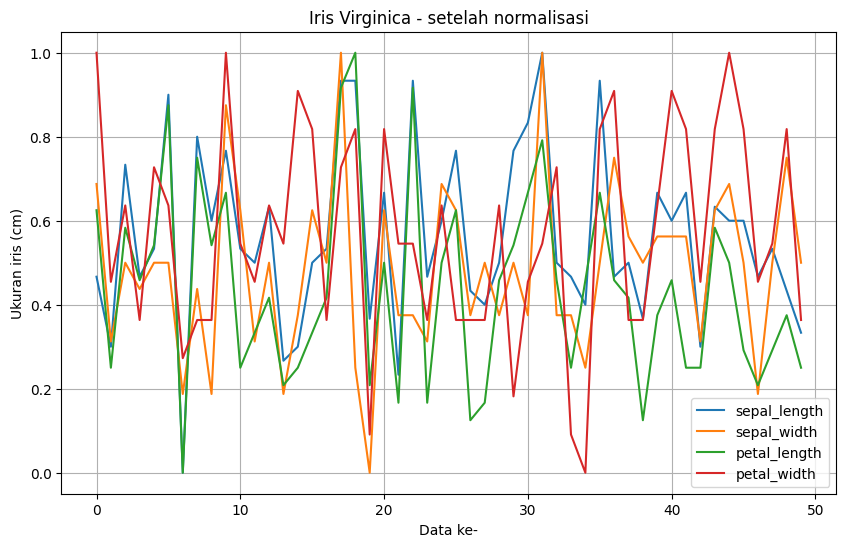

In [68]:
plot_iris(norm_setosa, "Iris Setosa - setelah normalisasi")  # Changed 'lot_iris' to 'plot_iris'
plot_iris(norm_versicolor, "Iris Versicolor - setelah normalisasi")
plot_iris(norm_virginica, "Iris Virginica - setelah normalisasi")

In [70]:
NIM = "622023013"

In [71]:
combined_data = np.vstack([
    np.hstack([norm_setosa, np.full((norm_setosa.shape[0], 1), 0)]),        # Label 0 untuk Setosa
    np.hstack([norm_versicolor, np.full((norm_versicolor.shape[0], 1), 1)]), # Label 1 untuk Versicolor
    np.hstack([norm_virginica, np.full((norm_virginica.shape[0], 1), 2)])    # Label 2 untuk Virginica
])

In [72]:
df_combined = pd.DataFrame(
    combined_data,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
csv_filename = f"Percobaan3_{NIM}.csv"
df_combined.to_csv(csv_filename, index=False)

npz_filename = f"Percobaan3_{NIM}.npz"
np.savez(
    npz_filename,
    setosa=norm_setosa,
    versicolor=norm_versicolor,
    virginica=norm_virginica
)

In [73]:
print("\nIsi Percobaan3_622023013.csv:")
print(pd.read_csv(csv_filename).head())


Isi Percobaan3_622023013.csv:
   sepal_length  sepal_width  petal_length  petal_width  species
0      0.533333     0.571429      0.444444          0.2      0.0
1      0.400000     0.333333      0.444444          0.2      0.0
2      0.266667     0.428571      0.333333          0.2      0.0
3      0.200000     0.380952      0.555556          0.2      0.0
4      0.466667     0.619048      0.444444          0.2      0.0


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [76]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


In [77]:
iris = load_iris()
X = iris.data
y = iris.target

# Hanya ambil 2 kelas: setosa (0) dan versicolor (1)
X = X[y != 2]
y = y[y != 2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [78]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

predictions = p.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Akurasi: {accuracy * 100:.2f}%")


Akurasi: 100.00%


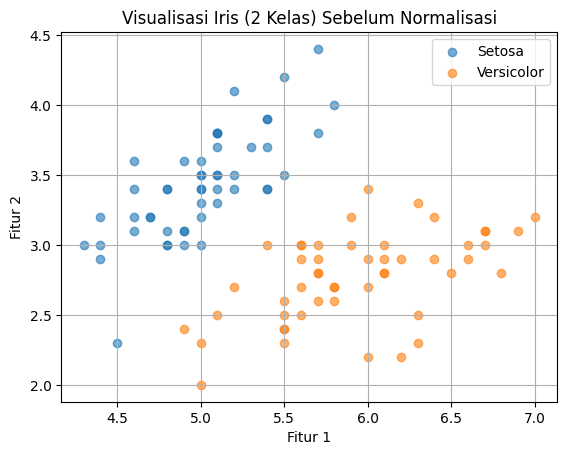

In [79]:
def plot_iris(data, label, title):
    plt.scatter(data[:, 0], data[:, 1], label=label, alpha=0.6)

# Pisah data berdasarkan label
setosa = X[y == 0]
versicolor = X[y == 1]

plot_iris(setosa, "Setosa", "Iris Dataset")
plot_iris(versicolor, "Versicolor", "Iris Dataset")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.legend()
plt.title("Visualisasi Iris (2 Kelas) Sebelum Normalisasi")
plt.grid(True)
plt.show()
